# Agriculture Project

In [2]:
# Importing Required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('train_agriculture.csv','\t')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
df.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0
4598,F00008083,2267,0,1,2,10,33.0,17,2,0


In [6]:
df.shape

(4599, 10)

In [7]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [8]:
le=LabelEncoder()
df['ID']=le.fit_transform(df['ID'])
df['ID']

0          0
1          1
2          2
3          3
4          4
        ... 
4594    4594
4595    4595
4596    4596
4597    4597
4598    4598
Name: ID, Length: 4599, dtype: int32

In [9]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   int32  
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 341.5 KB


In [11]:
df.isnull()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4594,False,False,False,False,False,False,True,False,False,False
4595,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [13]:
df.mean()

ID                         2299.000000
Estimated_Insects_Count    1363.000435
Crop_Type                     0.224831
Soil_Type                     0.476625
Pesticide_Use_Category        2.283540
Number_Doses_Week            26.477495
Number_Weeks_Used            28.891027
Number_Weeks_Quit             9.205479
Season                        1.894325
Crop_Damage                   0.194390
dtype: float64

In [14]:
df.fillna(df.mean(), inplace=True)

In [15]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [16]:
cols_object_int=["Number_Weeks_Used"]
for col in cols_object_int:
    df[col]=df[col].astype(int)

In [17]:
df.dtypes

ID                         int32
Estimated_Insects_Count    int64
Crop_Type                  int64
Soil_Type                  int64
Pesticide_Use_Category     int64
Number_Doses_Week          int64
Number_Weeks_Used          int32
Number_Weeks_Quit          int64
Season                     int64
Crop_Damage                int64
dtype: object

In [18]:
# Data visualizations

In [19]:
# To check missing values

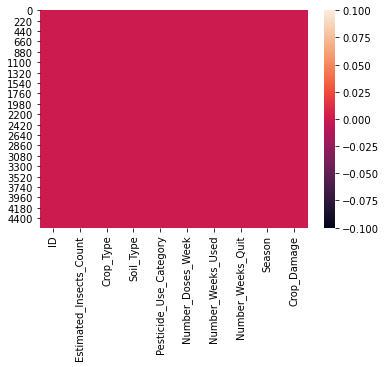

In [20]:
sns.heatmap(df.isnull())

In [21]:
# To check Correlation

In [22]:
dfcor=df.corr()
dfcor

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
ID,1.000000,0.055384,-0.124446,0.126621,-0.296851,0.031224,-0.095612,0.244521,-0.019987,-0.092715
Estimated_Insects_Count,0.055384,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.428238,0.246719,-0.009482,0.202312
Crop_Type,-0.124446,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002036,-0.273475,-0.000549,0.021772
Soil_Type,0.126621,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093690,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.296851,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.367823,-0.569467,0.008487,0.199195
Number_Doses_Week,0.031224,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099903,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,-0.095612,0.428238,-0.002036,-0.093690,0.367823,0.099903,1.000000,-0.445483,-0.010814,0.231439
Number_Weeks_Quit,0.244521,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.445483,1.000000,0.004861,-0.152918
Season,-0.019987,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010814,0.004861,1.000000,-0.016196
Crop_Damage,-0.092715,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231439,-0.152918,-0.016196,1.000000


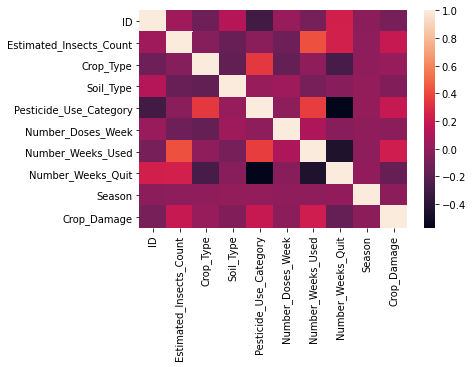

In [23]:
sns.heatmap(dfcor)

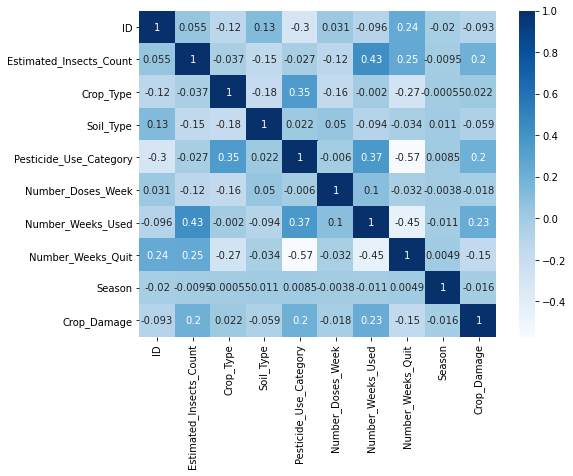

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(dfcor,cmap='Blues',annot=True)

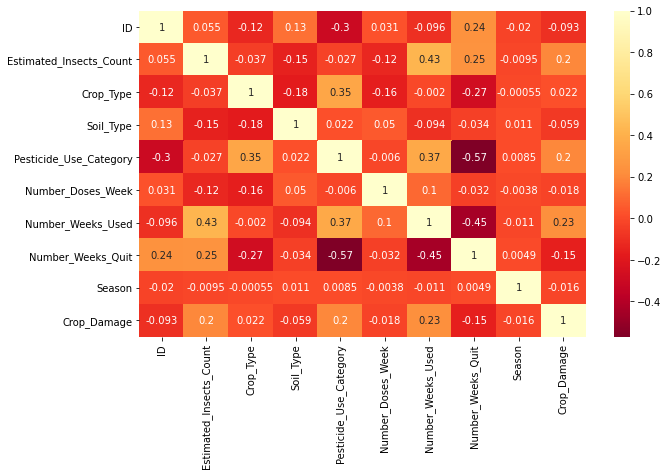

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

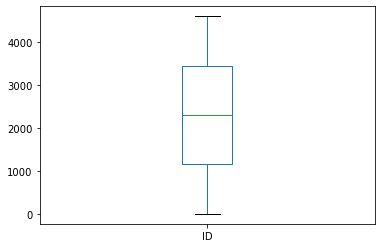

In [26]:
#univariate analysis
df['ID'].plot.box()

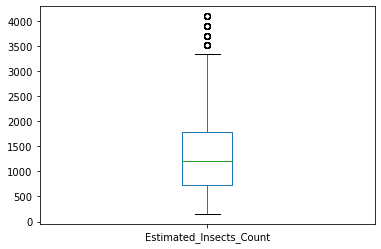

In [27]:
df['Estimated_Insects_Count'].plot.box()

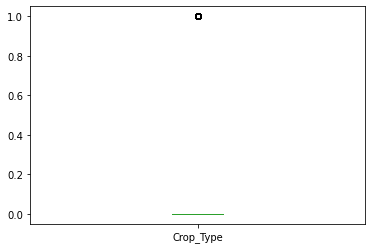

In [28]:
df['Crop_Type'].plot.box()

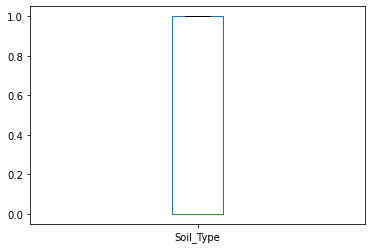

In [29]:
df['Soil_Type'].plot.box()

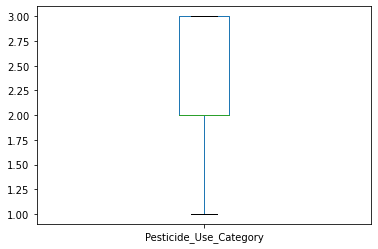

In [30]:
df['Pesticide_Use_Category'].plot.box()

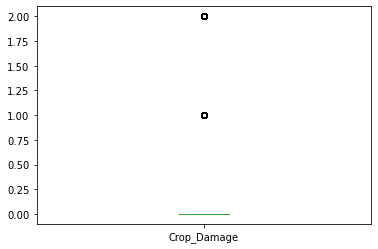

In [31]:
df['Crop_Damage'].plot.box()

In [32]:
collist=df.columns.values
ncol=12
nrows=10

In [33]:
plt.subplot?

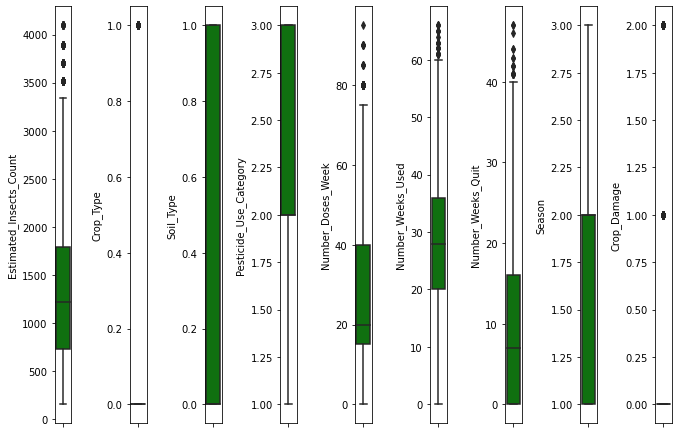

In [34]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

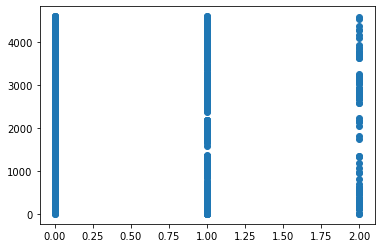

In [35]:
#bivariate analysis
plt.scatter(df['Crop_Damage'],df['ID'])

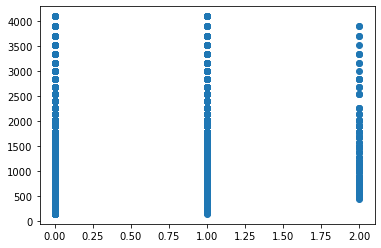

In [36]:
plt.scatter(df['Crop_Damage'],df['Estimated_Insects_Count'])

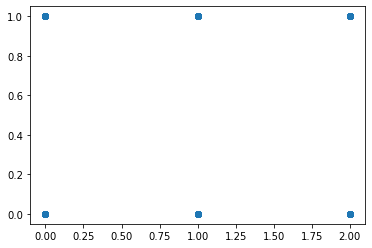

In [37]:
plt.scatter(df['Crop_Damage'],df['Crop_Type'])

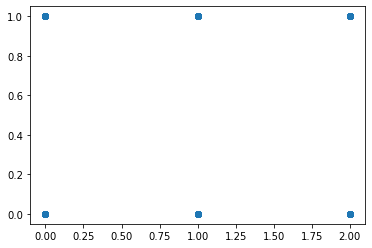

In [38]:
plt.scatter(df['Crop_Damage'],df['Soil_Type'])

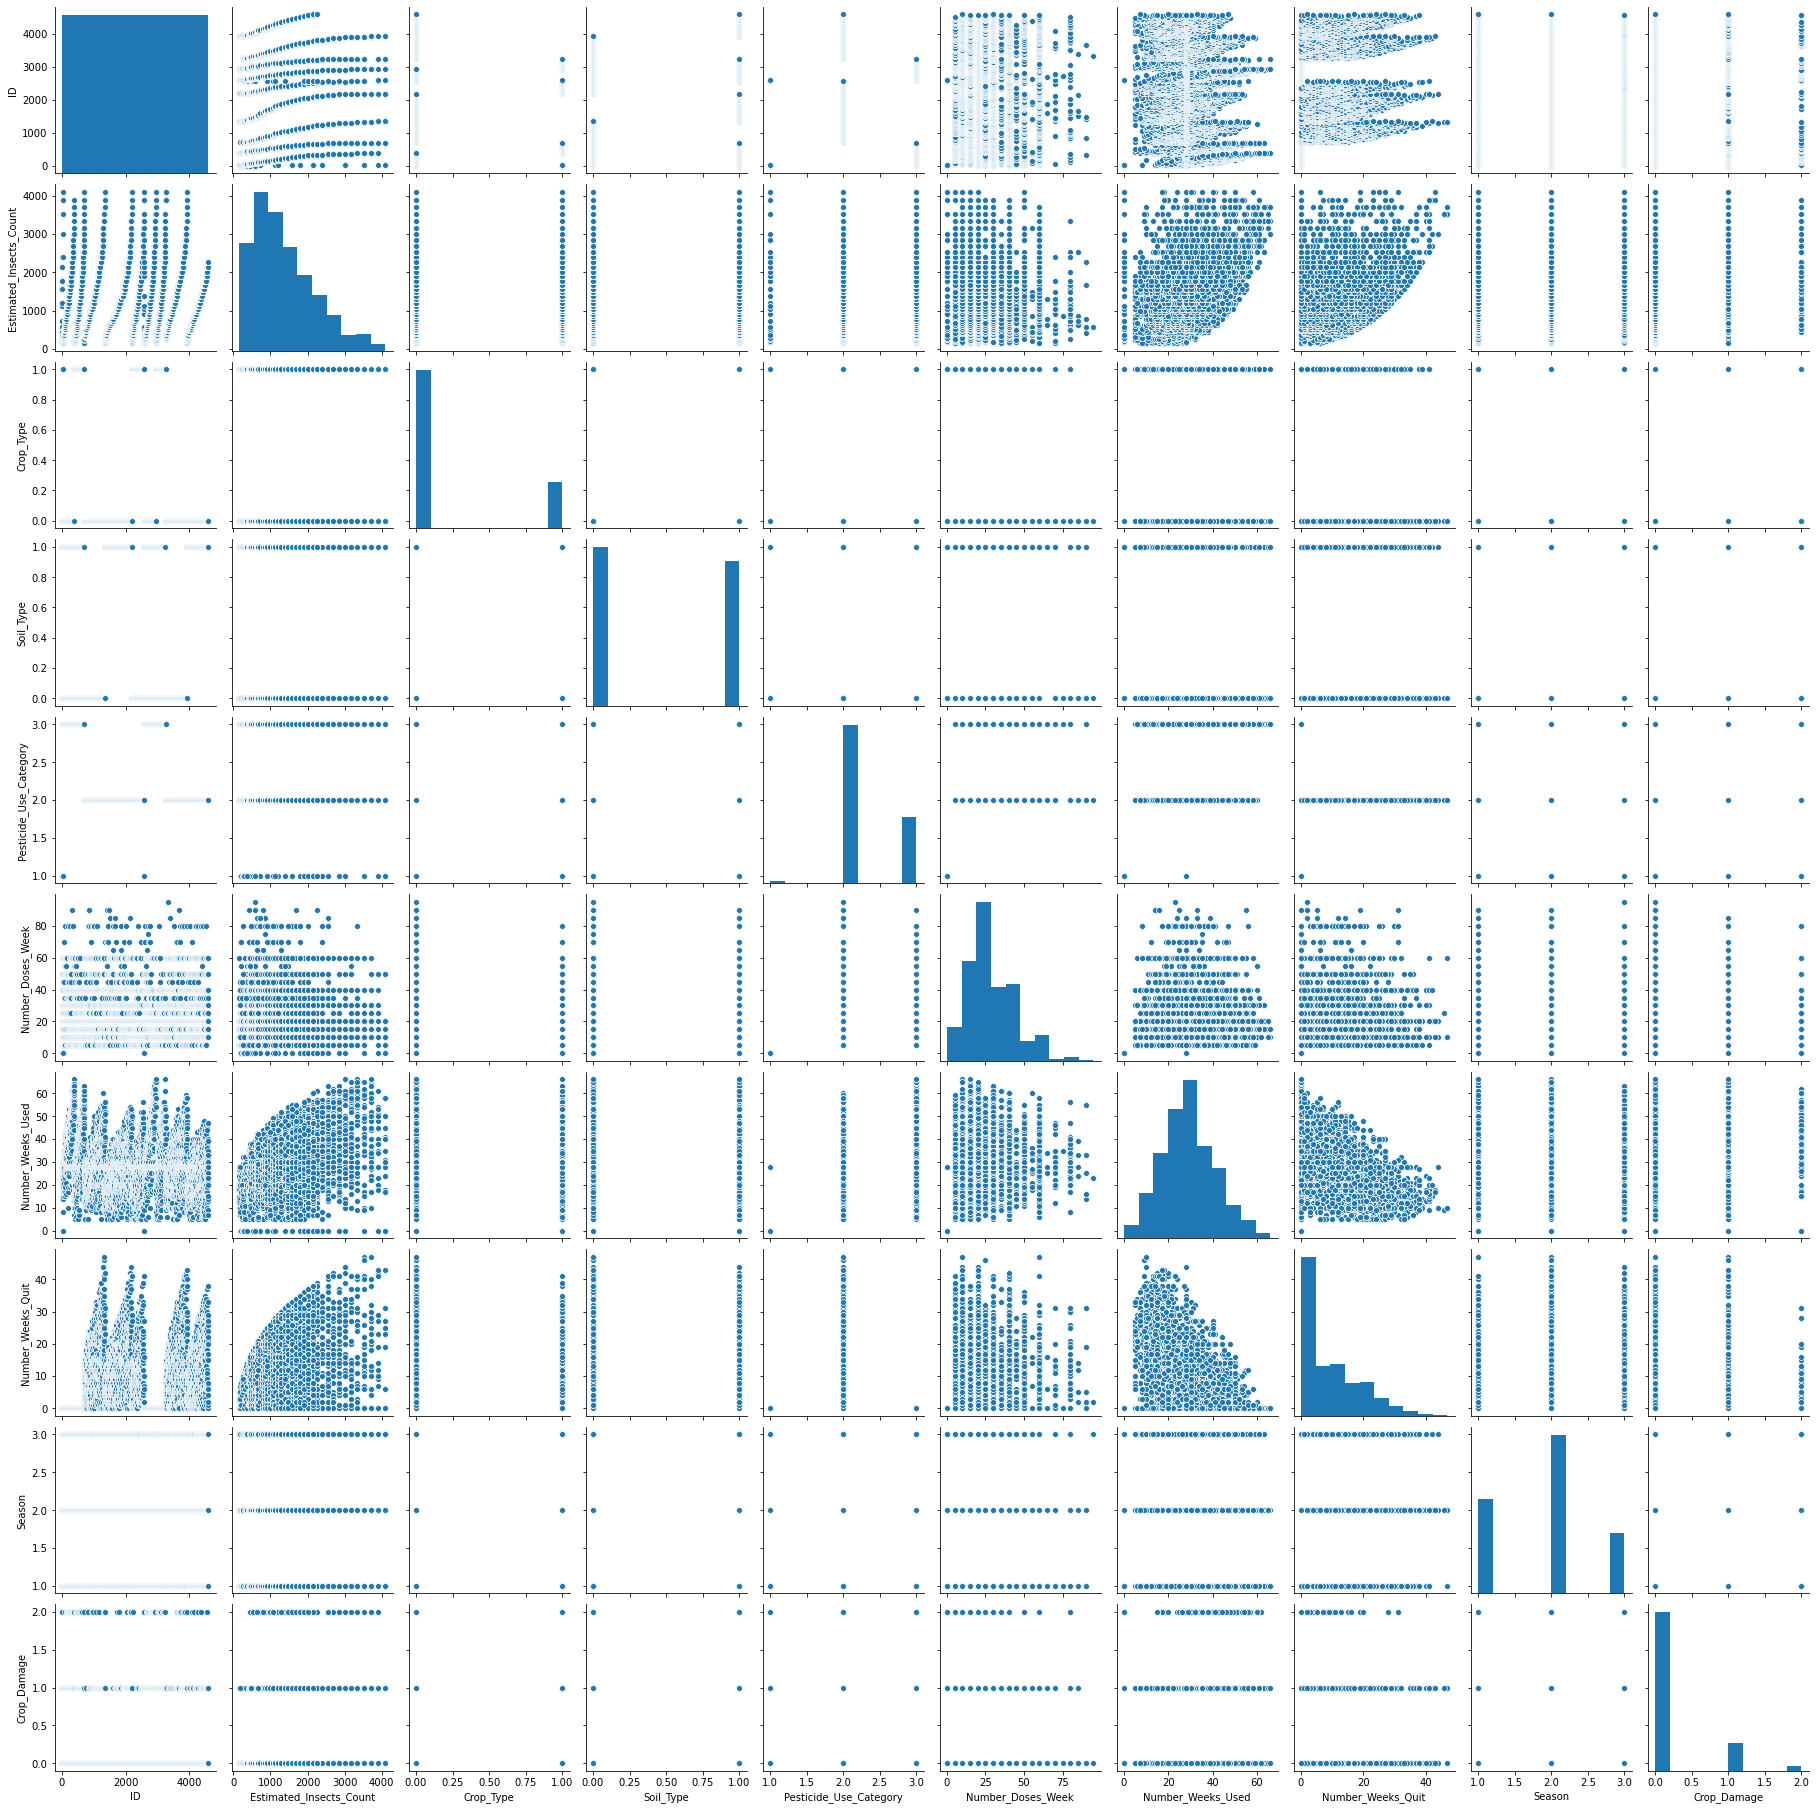

In [39]:
sns.pairplot(df)

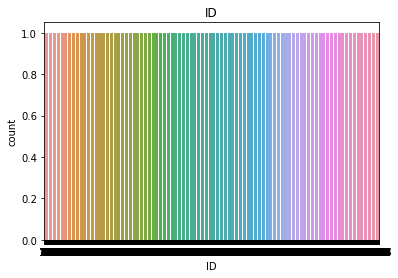

In [40]:
# Plotting the "Lat" Column

import seaborn as sn
sn.countplot(df["ID"])
plt.title("ID")
plt.show()

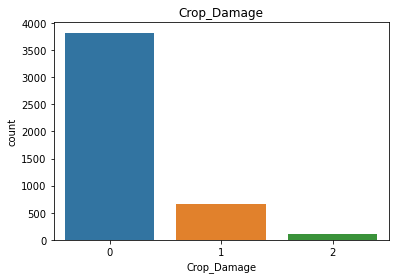

In [41]:
sn.countplot(df["Crop_Damage"])
plt.title("Crop_Damage")
plt.show()

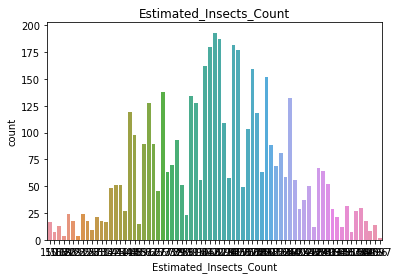

In [42]:
sn.countplot(df["Estimated_Insects_Count"])
plt.title("Estimated_Insects_Count")
plt.show()

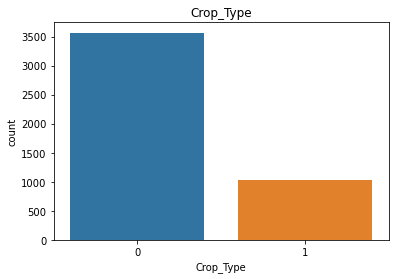

In [43]:
sn.countplot(df["Crop_Type"])
plt.title("Crop_Type")
plt.show()

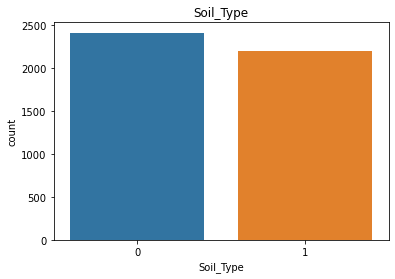

In [44]:
sn.countplot(df["Soil_Type"])
plt.title("Soil_Type")
plt.show()

In [45]:
# To check distribution of skewness

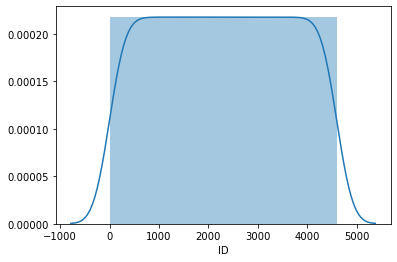

In [46]:
sns.distplot(df['ID'])

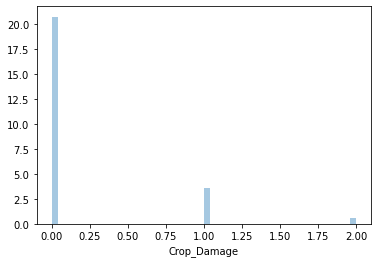

In [47]:
sns.distplot(df['Crop_Damage'])

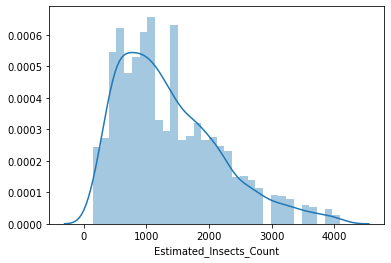

In [48]:
sns.distplot(df['Estimated_Insects_Count'])

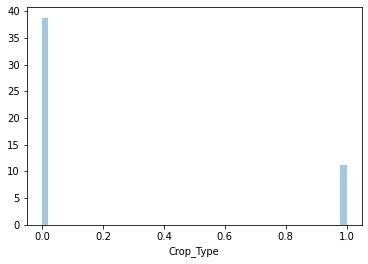

In [49]:
sns.distplot(df['Crop_Type'])

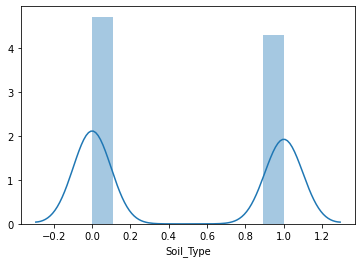

In [50]:
sns.distplot(df['Soil_Type'])

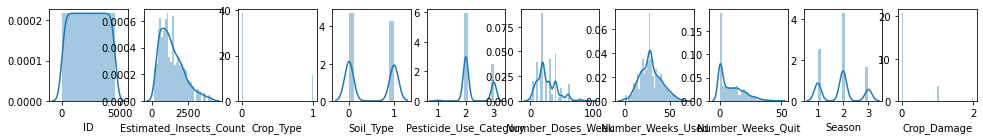

In [51]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

In [52]:
df.shape

(4599, 10)

In [53]:
df.skew()

ID                         0.000000
Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [54]:
# model Building
from sklearn.model_selection import train_test_split

In [55]:
y=df.iloc[:,9]
y

0       0
1       1
2       1
3       1
4       1
       ..
4594    1
4595    1
4596    0
4597    0
4598    0
Name: Crop_Damage, Length: 4599, dtype: int64

In [56]:
x=df.iloc[:,:9]
x

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,188,1,0,1,0,0,0,1
1,1,209,1,0,1,0,0,0,2
2,2,257,1,0,1,0,0,0,2
3,3,257,1,1,1,0,0,0,2
4,4,342,1,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...
4594,4594,2138,0,1,2,20,28,1,1
4595,4595,2139,0,1,2,30,47,2,1
4596,4596,2267,0,1,2,10,7,27,2
4597,4597,2267,0,1,2,10,20,24,2


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [58]:
print(x_train.shape, '\t',x_test.shape)

(3219, 9) 	 (1380, 9)


In [59]:
print(y_train.shape, '\t' ,y_test.shape)

(3219,) 	 (1380,)


In [60]:
clf = RandomForestClassifier()

In [61]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
y_pred= clf.predict(x_test)

In [63]:
accuracy_score(y_test,y_pred)

0.8268115942028985

In [64]:
ad = AdaBoostClassifier()

ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8384057971014492
[[1133   14    0]
 [ 174   24    0]
 [  29    6    0]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1147
           1       0.55      0.12      0.20       198
           2       0.00      0.00      0.00        35

    accuracy                           0.84      1380
   macro avg       0.46      0.37      0.37      1380
weighted avg       0.78      0.84      0.79      1380



In [65]:
lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8369565217391305
[[1139    8    0]
 [ 182   16    0]
 [  34    1    0]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1147
           1       0.64      0.08      0.14       198
           2       0.00      0.00      0.00        35

    accuracy                           0.84      1380
   macro avg       0.49      0.36      0.35      1380
weighted avg       0.79      0.84      0.78      1380



In [66]:
df1=pd.DataFrame(predad)
df1.to_csv('ad1_predicton.csv')

In [67]:
# Saving the model

import pickle
filename = 'model.pkl'
pickle.dump(ad,open(filename,'wb'))

# Using the test Dataset

In [68]:
# Loadig the test data
test_df=pd.read_csv("test_agriculture.csv",'\t')
test_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [69]:
test_df.shape

(1199, 9)

In [76]:
test_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [77]:
le=LabelEncoder()
test_df['ID']=le.fit_transform(test_df['ID'])
test_df['ID']

0          0
1          1
2          2
3          3
4          4
        ... 
1194    1194
1195    1195
1196    1196
1197    1197
1198    1198
Name: ID, Length: 1199, dtype: int32

In [71]:
# Loading the model

fitted_model = pickle.load(open("model.pkl","rb"))

In [72]:
fitted_model

AdaBoostClassifier()

In [78]:
test_df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   int32  
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int32(1), int64(7)
memory usage: 79.7 KB


In [80]:
test_df.isnull()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1194,False,False,False,False,False,False,False,False,False
1195,False,False,False,False,False,False,False,False,False
1196,False,False,False,False,False,False,False,False,False
1197,False,False,False,False,False,False,False,False,False


In [82]:
#Preprocessing Pipeline
test_df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [83]:
df.mean()

ID                         2299.000000
Estimated_Insects_Count    1363.000435
Crop_Type                     0.224831
Soil_Type                     0.476625
Pesticide_Use_Category        2.283540
Number_Doses_Week            26.477495
Number_Weeks_Used            28.805392
Number_Weeks_Quit             9.205479
Season                        1.894325
Crop_Damage                   0.194390
dtype: float64

In [84]:
test_df.fillna(test_df.mean(), inplace=True)

In [86]:
test_df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [87]:
cols_object_int=["Number_Weeks_Used"]
for col in cols_object_int:
    test_df[col]=test_df[col].astype(int)

In [89]:
test_df.dtypes

ID                         int32
Estimated_Insects_Count    int64
Crop_Type                  int64
Soil_Type                  int64
Pesticide_Use_Category     int64
Number_Doses_Week          int64
Number_Weeks_Used          int32
Number_Weeks_Quit          int64
Season                     int64
dtype: object

In [91]:
# Data visualizations

In [92]:
# To check missing values

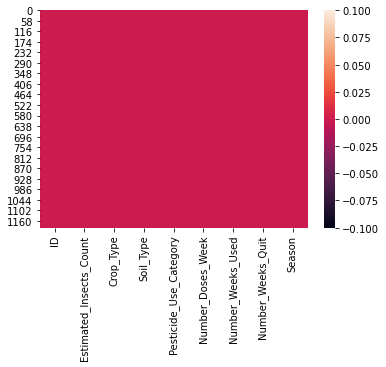

In [94]:
sns.heatmap(test_df.isnull())

In [95]:
# To check Correlation

In [97]:
test_dfcor=test_df.corr()
test_dfcor

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
ID,1.000000,-0.001266,-0.320471,0.177150,-0.688091,0.104807,-0.205354,0.580900,-0.028366
Estimated_Insects_Count,-0.001266,1.000000,0.020773,-0.339516,0.038259,-0.121168,0.491902,0.146441,0.023384
Crop_Type,-0.320471,0.020773,1.000000,0.063050,0.482378,-0.170014,0.062407,-0.390935,0.020282
Soil_Type,0.177150,-0.339516,0.063050,1.000000,0.129857,0.057118,-0.139690,-0.191989,-0.069242
Pesticide_Use_Category,-0.688091,0.038259,0.482378,0.129857,1.000000,-0.010922,0.406023,-0.584312,0.015085
Number_Doses_Week,0.104807,-0.121168,-0.170014,0.057118,-0.010922,1.000000,0.122973,0.009077,0.027197
Number_Weeks_Used,-0.205354,0.491902,0.062407,-0.139690,0.406023,0.122973,1.000000,-0.362569,0.018292
Number_Weeks_Quit,0.580900,0.146441,-0.390935,-0.191989,-0.584312,0.009077,-0.362569,1.000000,0.030281
Season,-0.028366,0.023384,0.020282,-0.069242,0.015085,0.027197,0.018292,0.030281,1.000000


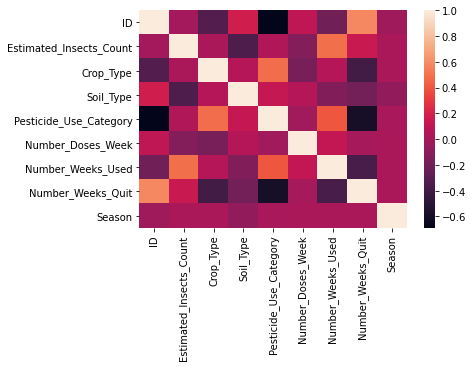

In [98]:
sns.heatmap(test_dfcor)

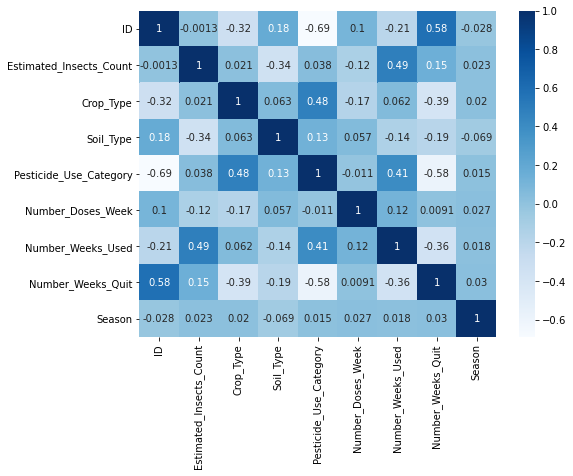

In [99]:
plt.figure(figsize=(8,6))
sns.heatmap(test_dfcor,cmap='Blues',annot=True)

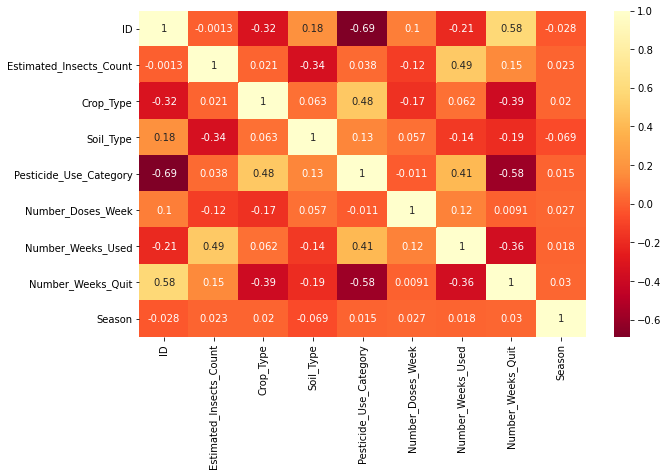

In [100]:
plt.figure(figsize=(10,6))
sns.heatmap(test_dfcor,cmap='YlOrRd_r',annot=True)

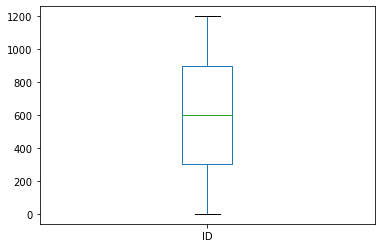

In [101]:
#univariate analysis
test_df['ID'].plot.box()

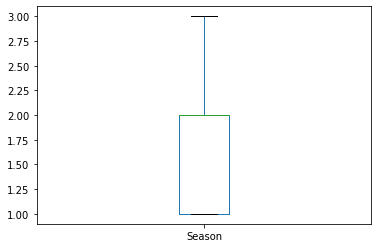

In [102]:
test_df['Season'].plot.box()

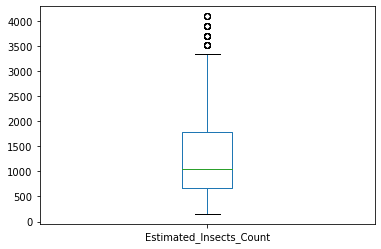

In [103]:
test_df['Estimated_Insects_Count'].plot.box()

In [108]:
collist=test_df.columns.values
ncol=12
nrows=10

In [109]:
plt.subplot?

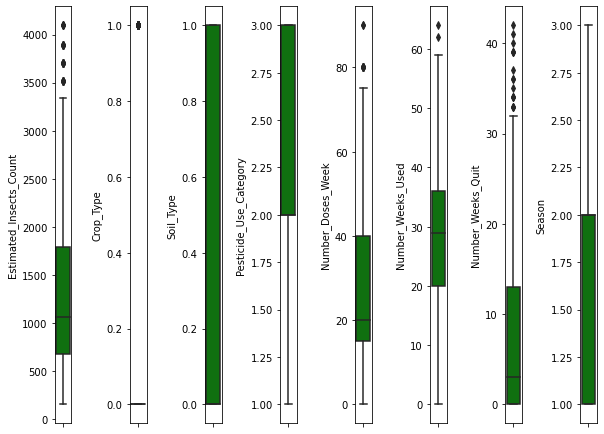

In [110]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(test_df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [111]:
# To check distribution of skewness

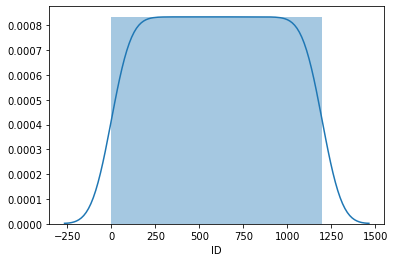

In [113]:
sns.distplot(test_df['ID'])

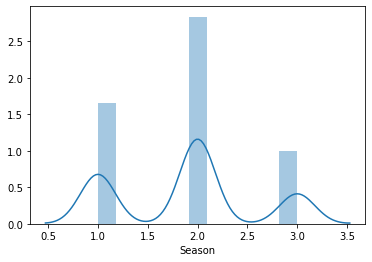

In [114]:
sns.distplot(test_df['Season'])

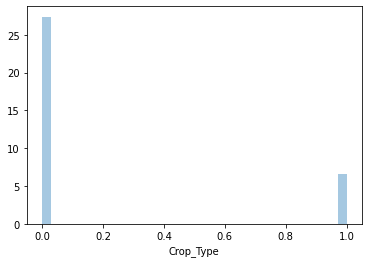

In [117]:
sns.distplot(test_df['Crop_Type'])

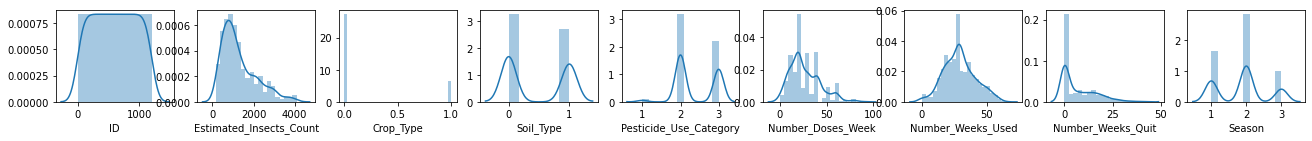

In [123]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(30,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(test_df[collist[i]])

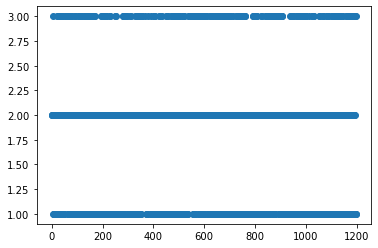

In [126]:
#bivariate analysis
plt.scatter(test_df['ID'],test_df['Season'])

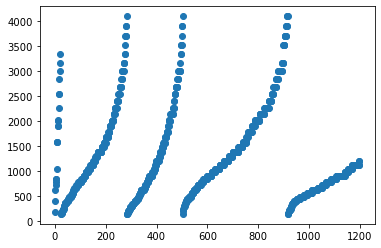

In [127]:
plt.scatter(test_df['ID'],test_df['Estimated_Insects_Count'])

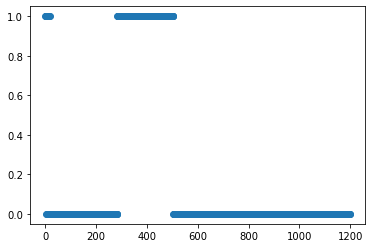

In [128]:
plt.scatter(test_df['ID'],test_df['Crop_Type'])

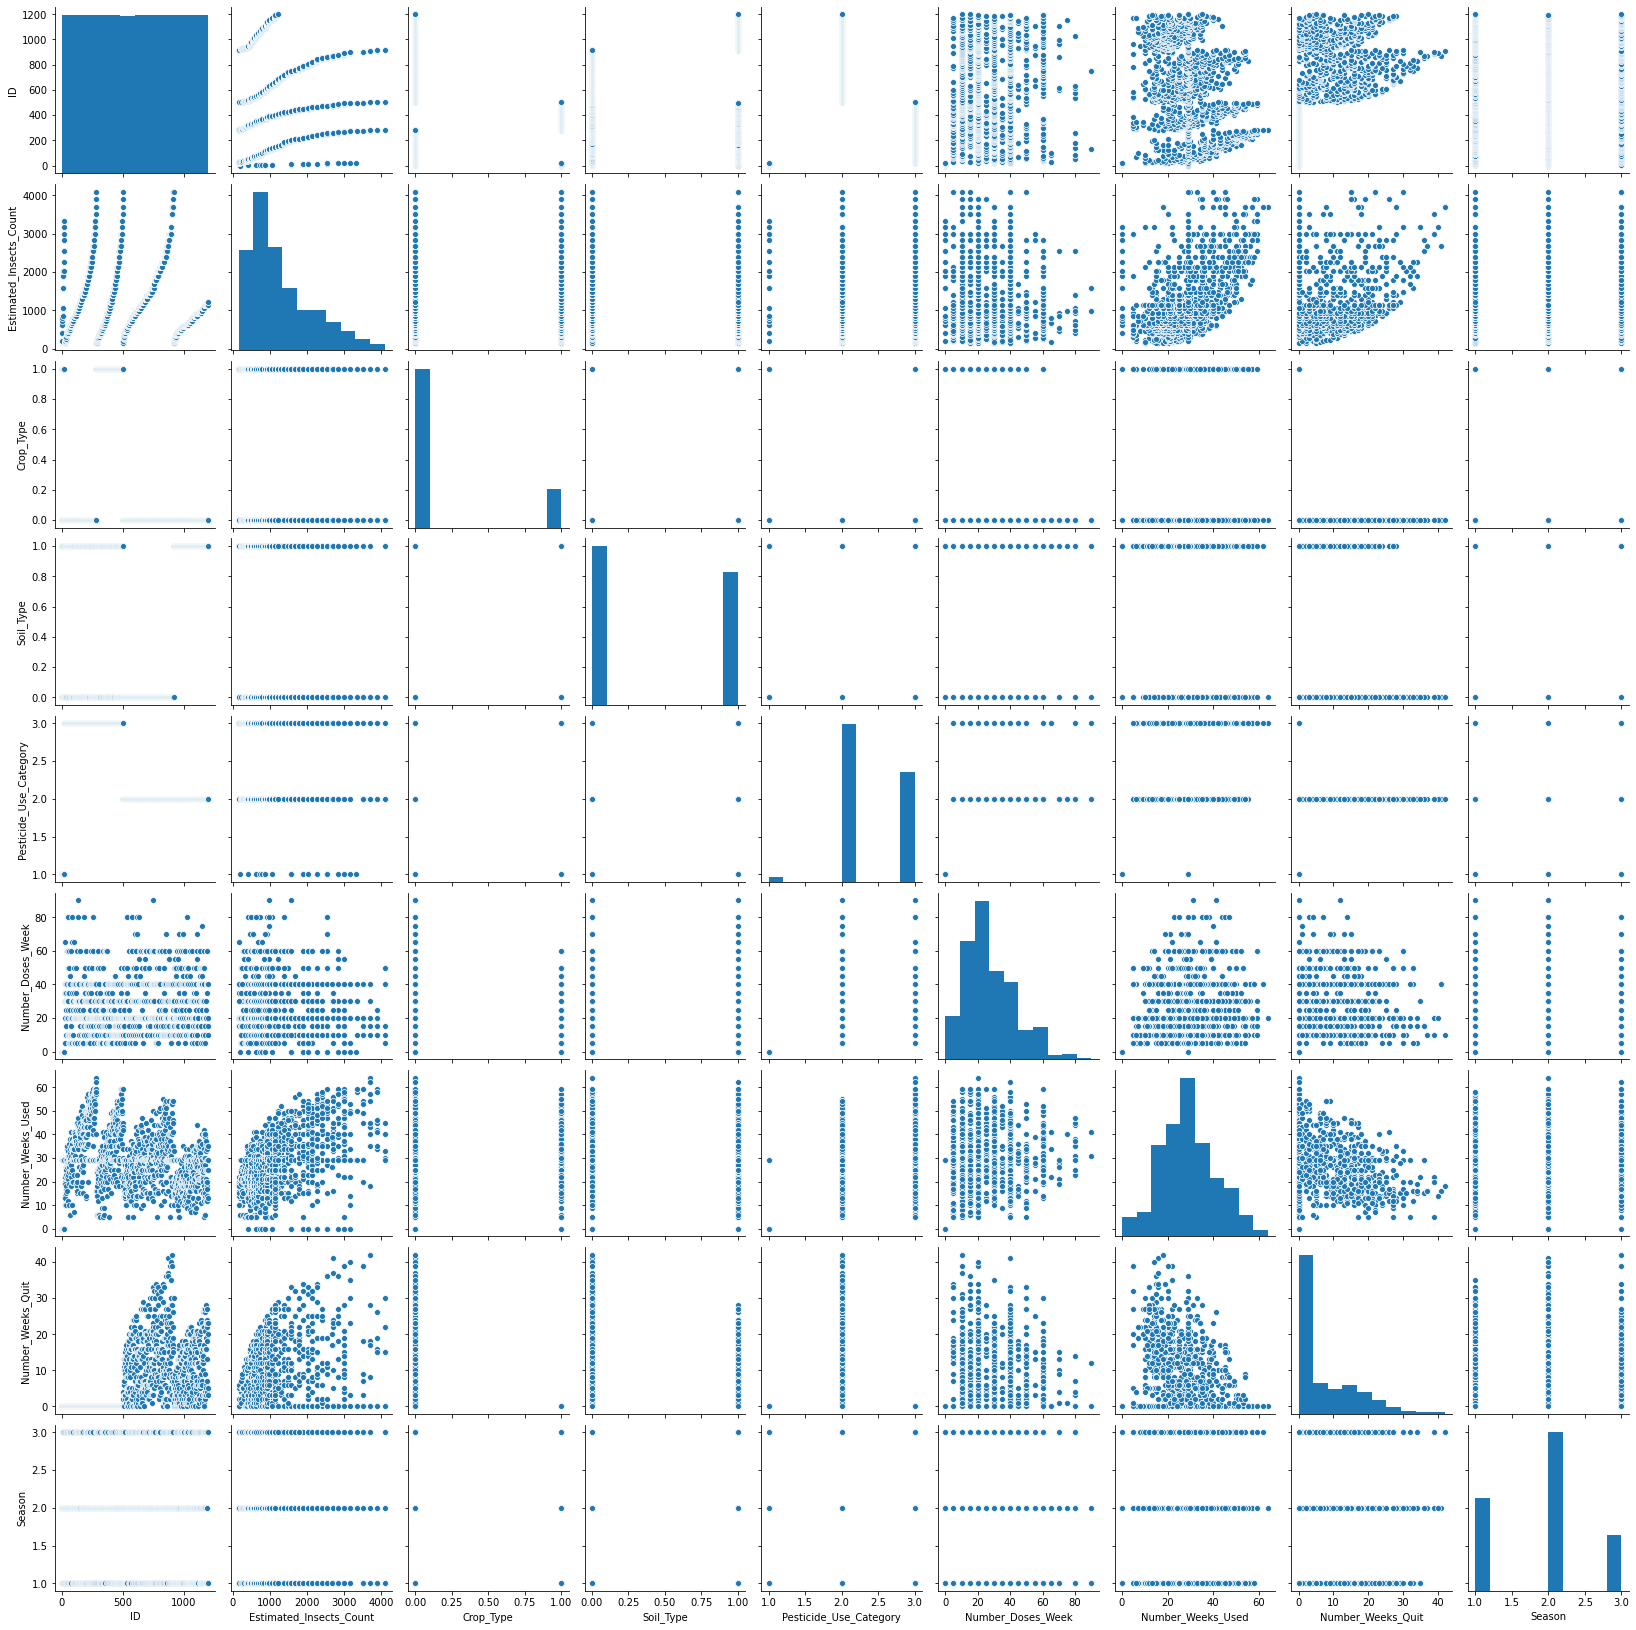

In [129]:
sns.pairplot(test_df)

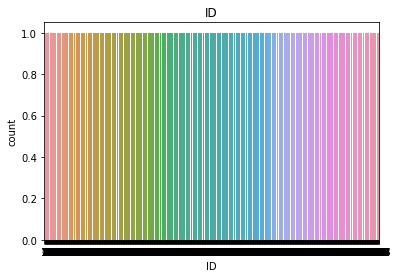

In [130]:
import seaborn as sn
sn.countplot(test_df["ID"])
plt.title("ID")
plt.show()

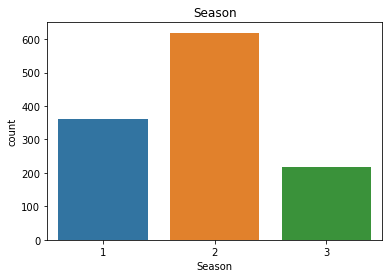

In [131]:
sn.countplot(test_df["Season"])
plt.title("Season")
plt.show()

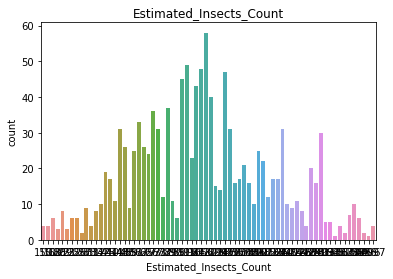

In [132]:
sn.countplot(test_df["Estimated_Insects_Count"])
plt.title("Estimated_Insects_Count")
plt.show()

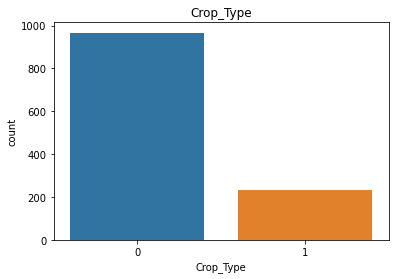

In [133]:
sn.countplot(test_df["Crop_Type"])
plt.title("Crop_Type")
plt.show()

In [134]:
# Load the model

fitted_model= pickle.load(open("model.pkl","rb"))

In [135]:
fitted_model

AdaBoostClassifier()

In [136]:
# Prediction over test data

predictions=fitted_model.predict(test_df)

In [137]:
predictions

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [140]:
test_df=pd.DataFrame(predad)
test_df.to_csv('ad2_predictons.csv')